# Загрузка данных

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!pip install pyspark


     |████████████████████████████████| 281.3 MB 40 kB/s 
     |████████████████████████████████| 198 kB 62.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=3cbbd93d40dc73c4fc26a5ccbd584f6e146ddfcc9b21496f40b0da7093a891ae
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [13]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path_1 = "/content/gdrive/MyDrive/praktikum/query_1.csv"
path_3 = "/content/gdrive/MyDrive/praktikum/query_3.csv"

In [6]:
APP_NAME = "DataFrames"
SPARK_URL = "local[*]"

spark = SparkSession.builder.appName(APP_NAME) \
        .config('spark.ui.showConsoleProgress', 'false') \
        .getOrCreate()

In [7]:
query_1 = spark.read.load(path_1, format='csv', header='true', inferSchema='true')

In [8]:
query_3 = spark.read.load(path_3, format='csv', header='true', inferSchema='true')

In [9]:
query_1.registerTempTable('query_1')

/usr/local/lib/python3.7/dist-packages/pyspark/sql/dataframe.py:140: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  FutureWarning


In [10]:
query_1.show(5)

+---------------+--------------+
|          model|flights_amount|
+---------------+--------------+
|Airbus A319-100|           607|
|Airbus A321-200|           960|
| Boeing 737-300|           630|
| Boeing 767-300|           600|
| Boeing 777-300|           300|
+---------------+--------------+
only showing top 5 rows



In [11]:
query_3.registerTempTable('query_3')

/usr/local/lib/python3.7/dist-packages/pyspark/sql/dataframe.py:140: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  FutureWarning


In [12]:
query_3.show(5)

+-----------+------------------+
|       city|   average_flights|
+-----------+------------------+
|     Абакан| 3.870967741935484|
|    Анадырь|               1.0|
|      Анапа| 2.161290322580645|
|Архангельск| 5.354838709677419|
|  Астрахань|2.4516129032258065|
+-----------+------------------+
only showing top 5 rows



# Анализ данных

**Топ-10 самых востребованных авианаправлений России**

In [16]:
top_10 = spark.sql('SELECT * FROM query_3 ORDER BY average_flights DESC LIMIT 10;')

In [17]:
df_top_10 = top_10.toPandas()

In [18]:
df_top_10

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


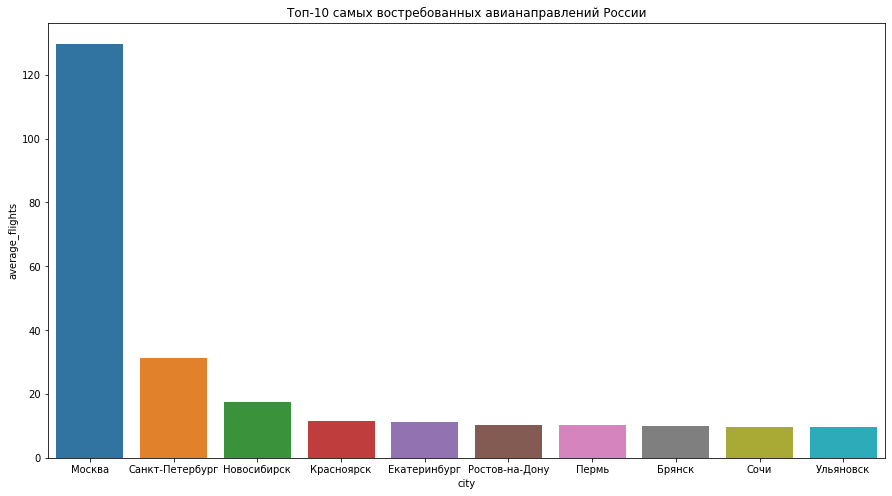

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(x='city',y='average_flights', data = df_top_10).set_title('Топ-10 самых востребованных авианаправлений России');

Наибольшее количество авиаперевозок в Москве. Москва - самый населеный город России. Один из крупнейших европейских городов. В Москве совершаются пересадки из городов, где нет прямых рейсов за границу.
На втором месте - Санкт-Петербург. Санкт-Петербург - второй по населению город России. Так же город является "культурной столицей" страны. Здесь тоже есть международные аэропорты, где так же можно совершить пересадку для перелета за границу. Город популярен среди туристов.
Третий город - Новосибирск.

**Самые популярные модели самолетов авиаперевозчиков России**

In [28]:
top_models = query_1.toPandas()

In [29]:
top_models.sort_values(by = 'flights_amount', inplace=True)

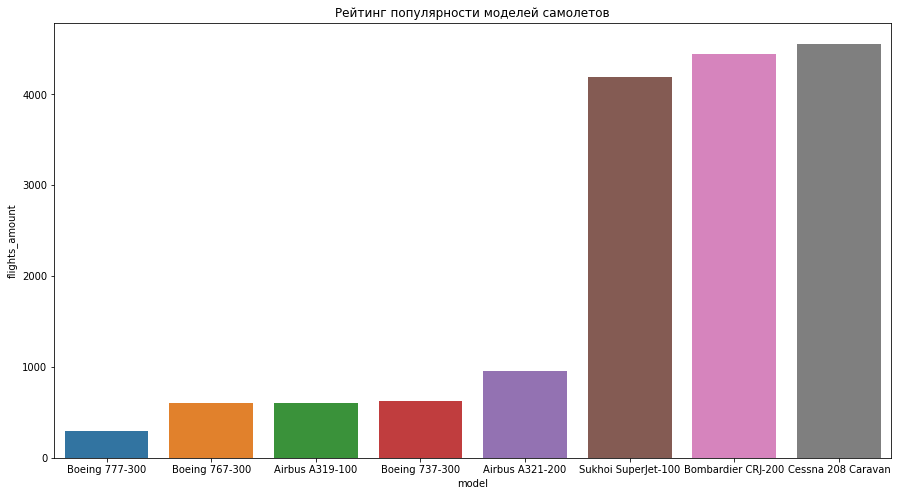

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(x='model',y='flights_amount', data = top_models).set_title('Рейтинг популярности моделей самолетов');

> Самой популярной моделью является Cessna 208 Caravan.
На сайте jets.ru пишут:

Представители производителя на выставки Aero в немецком Фридрихсхафене отмечают, что среди российских компаний увеличивается количество эксплуатантов этих региональных турбовинтовых машин. Российские операторы предпочитают модель Cessna 208B Grand Caravan, рассчитанную на перевозку девяти пассажиров и приспособленную для работы в сложных условиях, в том числе на грунтовых аэродромах с короткими ВПП.
Самолеты вместимостью до 10 пасс. очень востребованы для обслуживания местных линий, поскольку стоимость перевозок на Ан-2, традиционно эксплуатировавшихся на этих маршрутах, возросла из-за высокой стоимости авиационного бензина. Турбовинтовой самолет Cessna заправляется обычным авиационным керосином.

> На втрром месте Bombardier CRJ 200 

Этот небольшой 50-местный самолет полностью соответствует потребностям региональных перевозчиков и пассажиров, а финансовая возможность для покупки самолетов CRJ 200 у российских компаний появилась благодаря вторичному рынку.

> На третьем месте Sukhoi Superjet 100

Российский ближнемагистральный узкофюзеляжный пассажирский самолёт, предназначенный для перевозки от 87 до 108 пассажиров на дальность 3050 или 4600 км. Разработан компанией «Гражданские самолёты Сухого» при участии ряда иностранных компаний. Первый пассажирский самолёт, разработанный в России после распада СССР.